In [2]:
#Bollinger Bands 
import pandas as pd 
import numpy as np
import pandas_datareader.data as pdr 
import datetime as dt 
import matplotlib.pyplot as plt
import datetime as time

C:\Users\federico\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [30]:
# I use the API to download directly the data from yahoo instead of passing from a Csv 
ticker= ("^GSPC")

start_date=time.datetime(2018, 1,1)
end_date=dt.date.today()
data= pdr.get_data_yahoo(ticker,start_date,end_date, interval="d")
df=data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,2695.889893,2682.360107,2683.729980,2695.810059,3367250000,2695.810059
2018-01-03,2714.370117,2697.770020,2697.850098,2713.060059,3538660000,2713.060059
2018-01-04,2729.290039,2719.070068,2719.310059,2723.989990,3695260000,2723.989990
2018-01-05,2743.449951,2727.919922,2731.330078,2743.149902,3236620000,2743.149902
2018-01-08,2748.510010,2737.600098,2742.669922,2747.709961,3242650000,2747.709961
...,...,...,...,...,...,...
2020-10-09,3482.340088,3458.070068,3459.669922,3477.139893,3939060000,3477.139893
2020-10-12,3549.850098,3499.610107,3500.020020,3534.219971,3428970000,3534.219971
2020-10-13,3534.010010,3500.860107,3534.010010,3511.929932,3605150000,3511.929932


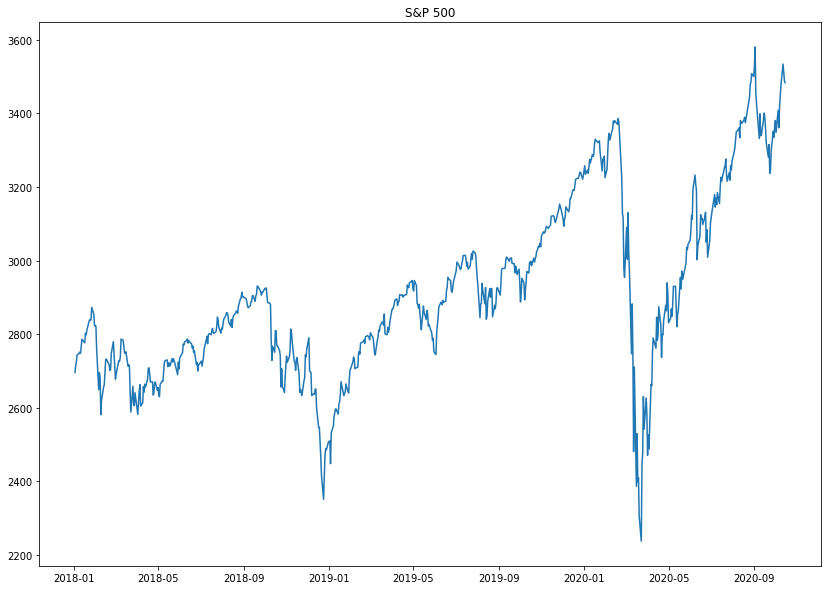

In [31]:
plt.figure(figsize=(14,10))
plt.title("S&P 500")
plt.plot(df["Adj Close"])


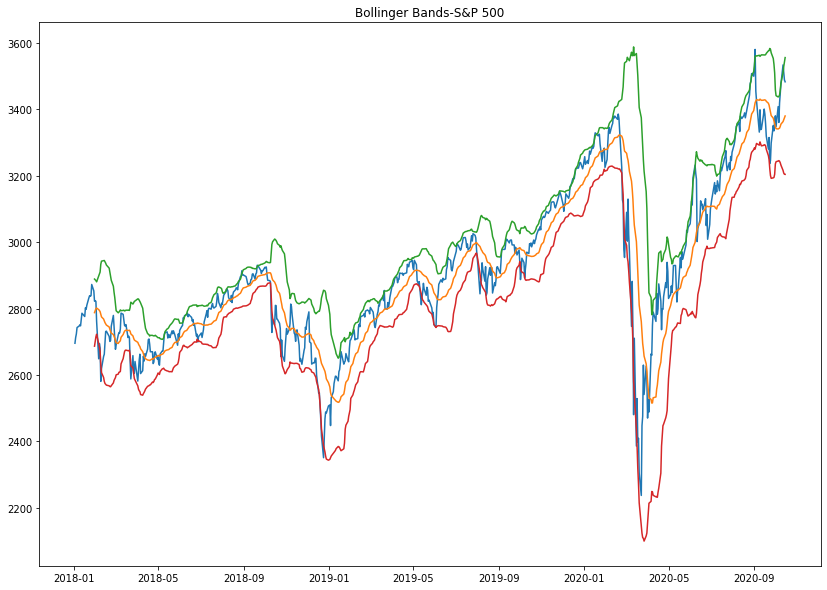

In [32]:
df["MA"] = df['Adj Close'].rolling(20).mean()
df["up"] = df["MA"] + 2*df['Adj Close'].rolling(20).std() 
df["down"] = df["MA"] - 2*df['Adj Close'].rolling(20).std() 
plt.figure(figsize=(14,10))
plt.title("Bollinger Bands-S&P 500")

plt.plot(df.iloc[:,5:])




In [33]:
df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15'],
              dtype='datetime64[ns]', name='Date', length=703, freq=None)

In [21]:
df["signal"]=None

In [22]:
df

,High,Low,Open,Close,Volume,Adj Close,MA,up,down,signal
Date,,,,,,,,,,
2015-01-02,2072.360107,2046.040039,2058.899902,2058.199951,2708700000,2058.199951,NaN,NaN,NaN,None
2015-01-05,2054.439941,2017.339966,2054.439941,2020.579956,3799120000,2020.579956,NaN,NaN,NaN,None
2015-01-06,2030.250000,1992.439941,2022.150024,2002.609985,4460110000,2002.609985,NaN,NaN,NaN,None
2015-01-07,2029.609985,2005.550049,2005.550049,2025.900024,3805480000,2025.900024,NaN,NaN,NaN,None
2015-01-08,2064.080078,2030.609985,2030.609985,2062.139893,3934010000,2062.139893,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...
2020-10-09,3482.340088,3458.070068,3459.669922,3477.139893,3939060000,3477.139893,3355.879004,3479.526856,3232.231152,None
2020-10-12,3549.850098,3499.610107,3500.020020,3534.219971,3428970000,3534.219971,3363.413000,3510.330022,3216.495979,None
2020-10-13,3534.010010,3500.860107,3534.010010,3511.929932,3605150000,3511.929932,3368.949500,3529.568875,3208.330124,None


In [23]:

for i in range(len(df.index)):
    #Buy signal when adj close is than the down bollinger bands
    if df["Adj Close"][i] <df['down'][i]:
        df.iloc[i,9]= 1
    #sell if the MD is above the up bollinger bands
    if df["Adj Close"][i] > df['up'][i]:
        df.iloc[i,9]= 0
df

,High,Low,Open,Close,Volume,Adj Close,MA,up,down,signal
Date,,,,,,,,,,
2015-01-02,2072.360107,2046.040039,2058.899902,2058.199951,2708700000,2058.199951,NaN,NaN,NaN,None
2015-01-05,2054.439941,2017.339966,2054.439941,2020.579956,3799120000,2020.579956,NaN,NaN,NaN,None
2015-01-06,2030.250000,1992.439941,2022.150024,2002.609985,4460110000,2002.609985,NaN,NaN,NaN,None
2015-01-07,2029.609985,2005.550049,2005.550049,2025.900024,3805480000,2025.900024,NaN,NaN,NaN,None
2015-01-08,2064.080078,2030.609985,2030.609985,2062.139893,3934010000,2062.139893,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...
2020-10-09,3482.340088,3458.070068,3459.669922,3477.139893,3939060000,3477.139893,3355.879004,3479.526856,3232.231152,None
2020-10-12,3549.850098,3499.610107,3500.020020,3534.219971,3428970000,3534.219971,3363.413000,3510.330022,3216.495979,0
2020-10-13,3534.010010,3500.860107,3534.010010,3511.929932,3605150000,3511.929932,3368.949500,3529.568875,3208.330124,None


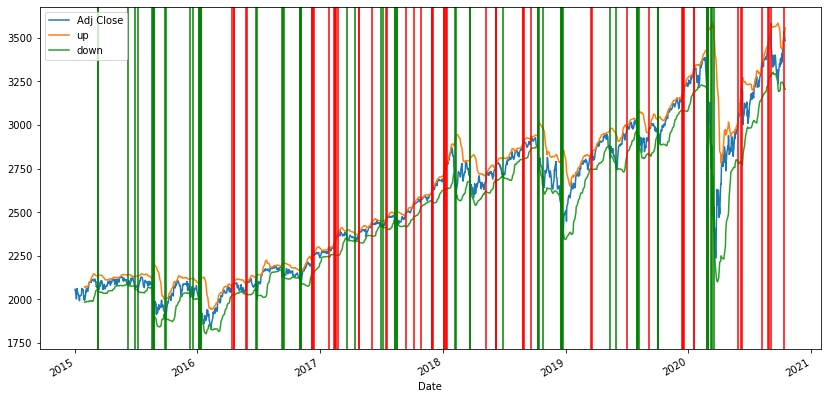

In [24]:

df[['Adj Close',  'up','down']].plot(figsize=(14, 7))


for index, pos in df['signal'].dropna().iteritems():
    plt.axvline(index, color='green' if pos == 1 else 'red')

   